In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [4]:
df=yf.download('^GSPC',start='2023-02-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,4070.070068,4148.950195,4037.199951,4119.209961,4119.209961,4856930000
2023-02-02,4158.680176,4195.439941,4141.879883,4179.759766,4179.759766,5624360000
2023-02-03,4136.689941,4182.359863,4123.359863,4136.479980,4136.479980,4694510000
2023-02-06,4119.569824,4124.629883,4093.379883,4111.080078,4111.080078,4114240000
2023-02-07,4105.350098,4176.540039,4088.389893,4164.000000,4164.000000,4355860000
...,...,...,...,...,...,...
2024-05-20,5305.350098,5325.319824,5302.399902,5308.129883,5308.129883,3420100000
2024-05-21,5298.689941,5324.319824,5297.870117,5321.410156,5321.410156,3662240000
2024-05-22,5319.279785,5323.180176,5286.009766,5307.009766,5307.009766,3847130000


In [18]:
supports=df[df.Low==df.Low.rolling(5,center=True).min()].Low #it gives the support lines
resistances=df[df.High==df.High.rolling(5,center=True).max()].High #it gives resistance lines

In [19]:
supports

Date
2023-02-10    4060.790039
2023-02-24    3943.080078
2023-03-02    3928.159912
2023-03-13    3808.860107
2023-03-24    3909.159912
2023-04-06    4069.840088
2023-04-26    4049.350098
2023-05-04    4048.280029
2023-05-10    4098.919922
2023-05-24    4103.979980
2023-06-08    4261.069824
2023-06-26    4328.080078
2023-07-06    4385.049805
2023-07-27    4528.560059
2023-08-18    4335.310059
2023-08-25    4356.290039
2023-09-07    4430.459961
2023-09-27    4238.629883
2023-10-03    4216.450195
2023-10-06    4219.549805
2023-10-13    4311.970215
2023-10-27    4103.779785
2023-11-09    4343.939941
2023-11-30    4537.240234
2023-12-06    4546.500000
2023-12-20    4697.819824
2024-01-05    4682.109863
2024-01-17    4714.819824
2024-01-31    4845.149902
2024-02-13    4920.310059
2024-02-21    4946.000000
2024-02-27    5057.290039
2024-03-05    5056.819824
2024-03-11    5091.140137
2024-03-15    5104.350098
2024-03-26    5203.419922
2024-04-04    5146.060059
2024-04-19    4953.560059
2024-04

In [20]:
resistances

Date
2023-02-14    4159.770020
2023-03-06    4078.489990
2023-03-16    3964.459961
2023-03-22    4039.489990
2023-04-04    4133.129883
2023-04-18    4169.479980
2023-05-01    4186.919922
2023-05-10    4154.279785
2023-05-19    4212.910156
2023-06-05    4299.279785
2023-06-16    4448.470215
2023-06-30    4458.479980
2023-07-19    4578.430176
2023-07-27    4607.069824
2023-08-10    4527.370117
2023-08-24    4458.299805
2023-09-01    4541.250000
2023-09-11    4490.770020
2023-09-14    4511.990234
2023-09-29    4333.149902
2023-10-12    4385.850098
2023-10-17    4393.569824
2023-11-15    4521.169922
2023-11-22    4568.430176
2023-12-01    4599.390137
2023-12-20    4778.009766
2023-12-28    4793.299805
2024-01-12    4802.399902
2024-01-30    4931.089844
2024-02-02    4975.290039
2024-02-12    5048.390137
2024-02-16    5038.700195
2024-02-23    5111.060059
2024-03-04    5149.669922
2024-03-08    5189.259766
2024-03-21    5261.100098
2024-03-28    5264.850098
2024-04-04    5256.589844
2024-04

In [22]:
levels=pd.concat([support,resistances])

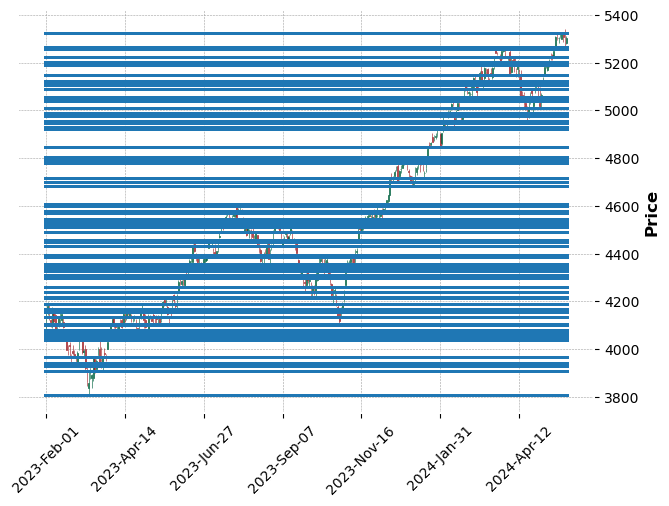

In [23]:
mpf.plot(df,type='candle',hlines=levels.to_list(),style='charles')

In [24]:
#filtering it

In [27]:
levels=levels[abs(levels.diff()) >100]

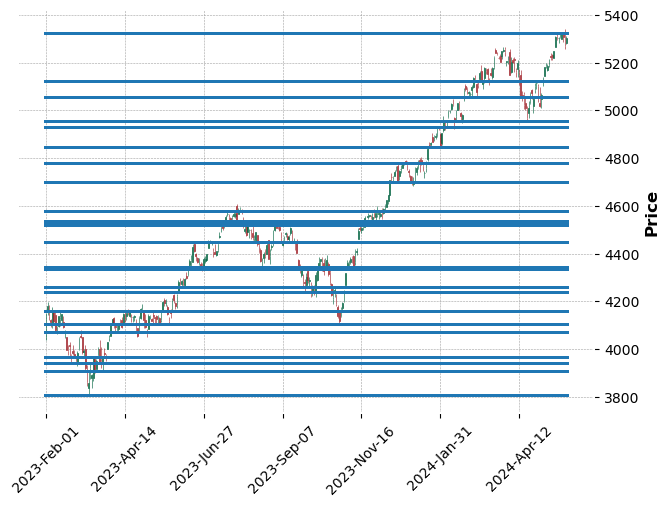

In [28]:
mpf.plot(df,type='candle',hlines=levels.to_list(),style='charles') #now it looks more clean

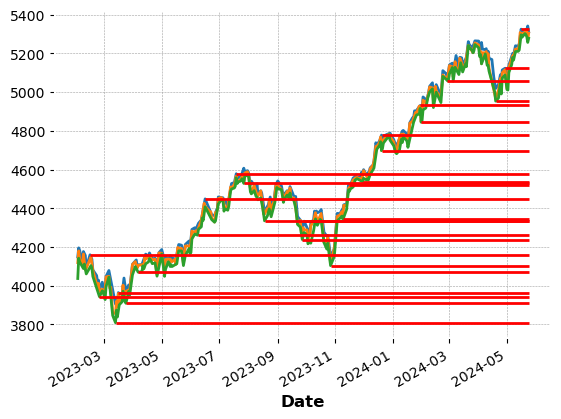

In [35]:
#using matplot lib
df.High.plot()
df.Close.plot()
df.Low.plot()
plt.hlines(levels,xmin=levels.index,xmax=df.index[-1],color='r')